# Predicting House Prices based on diffrent features with Linear Regression using TensorFlow

---



## 1.1: Importing Libraries & Helper Functions

First of all, we will need to import some libraries and helper functions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline

print('Libraries imported.')

Libraries imported.


# Task 2: Importing the Data

## 2.1: Importing the Data

The dataset is saved in a `data.csv` file. We will use `pandas` to take a look at some of the rows.

In [4]:
df=pd.read_csv('data.csv',names=column_names)
print(df.head())

   serial  date  age  distance  stores  latitude  longitude  price
0       0  2009   21         9       6        84        121  14264
1       1  2007    4         2       3        86        121  12032
2       2  2016   18         3       7        90        120  13560
3       3  2002   13         2       2        80        128  12029
4       4  2014   25         5       8        81        122  14157


## 2.2: Check Missing Data

It's a good practice to check if the data has any missing values. 

In [5]:
print(df.isna().sum())


serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64


# Task 3: Data Normalization

## 3.1: Data Normalization

We can make it easier for optimization algorithms to find minimas by normalizing the data before training a model.

In [6]:
df=df.iloc[:,1:]
df_norm=(df-df.mean())/df.std()
print(df_norm.head())

       date       age  distance    stores  latitude  longitude     price
0  0.015978  0.181384  1.257002  0.345224 -0.307212  -1.260799  0.350088
1 -0.350485 -1.319118 -0.930610 -0.609312  0.325301  -1.260799 -1.836486
2  1.298598 -0.083410 -0.618094  0.663402  1.590328  -1.576456 -0.339584
3 -1.266643 -0.524735 -0.930610 -0.927491 -1.572238   0.948803 -1.839425
4  0.932135  0.534444  0.006938  0.981581 -1.255981  -0.945141  0.245266


## 3.2: Convert Label Value



In [7]:
y_mean=df['price'].mean()
y_std=df['price'].std()

def convert_label_value(pred):
    return int(pred *y_std + y_mean )

print(convert_label_value(0.350088))

14263


# Task 4: Create Training and Test Sets

## 4.1: Select Features

Make sure to remove the column __price__ from the list of features as it is the label and should not be used as a feature.

In [8]:
x=df_norm.iloc[:,:6]
print(x.head())

       date       age  distance    stores  latitude  longitude
0  0.015978  0.181384  1.257002  0.345224 -0.307212  -1.260799
1 -0.350485 -1.319118 -0.930610 -0.609312  0.325301  -1.260799
2  1.298598 -0.083410 -0.618094  0.663402  1.590328  -1.576456
3 -1.266643 -0.524735 -0.930610 -0.927491 -1.572238   0.948803
4  0.932135  0.534444  0.006938  0.981581 -1.255981  -0.945141


## 4.2: Select Labels

In [9]:
y=df_norm.iloc[:,-1]
print(y.head())

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64


## 4.3: Feature and Label Values

We will need to extract just the numeric values for the features and labels as the TensorFlow model will expect just numeric values as input.

In [10]:
x_arr=x.values
y_arr=y.values
print('features array shape',x_arr.shape)
print('label array shape',y_arr.shape)

features array shape (5000, 6)
label array shape (5000,)


## 4.4: Train and Test Split

We will keep some part of the data aside as a __test__ set. The model will not use this set during training and it will be used only for checking the performance of the model in trained and un-trained states. This way, we can make sure that we are going in the right direction with our model training.

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_arr,y_arr,test_size=0.05,random_state=0)
print('training set',x_train.shape, y_train.shape)
print('test set',x_test.shape,y_test.shape)

training set (4750, 6) (4750,)
test set (250, 6) (250,)


# Task 5: Create the Model

## 5.1: Create the Model

Let's write a function that returns an untrained model of a certain architecture.

In [12]:
def get_model():
    model=Sequential([
        Dense(10,input_shape=(6,),activation='relu'),
        Dense(20,activation='relu'),
        Dense(5,activation='relu'),
        Dense(1)    
    ])

    model.compile(
        loss='mse',
        optimizer='adam'
    )
    return model

get_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# Task 6: Model Training

## 6.1: Model Training

We can use an `EarlyStopping` callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs.

In [13]:
es_cb=EarlyStopping(monitor='val_loss',patience=5)

model=get_model()
preds_on_untrained=model.predict(x_test)

history=model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=100,
    callbacks=[es_cb]
    )

Epoch 1/100
149/149 [==============================] - 1s 3ms/step - loss: 0.5724 - val_loss: 0.3115
Epoch 2/100
149/149 [==============================] - 0s 1ms/step - loss: 0.2526 - val_loss: 0.1947
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1877 - val_loss: 0.1723
Epoch 4/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1717 - val_loss: 0.1636
Epoch 5/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1646 - val_loss: 0.1582
Epoch 6/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1615 - val_loss: 0.1588
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1592 - val_loss: 0.1571
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1584 - val_loss: 0.1535
Epoch 9/100
149/149 [==============================] - 0s 1ms/step - loss: 0.1565 - val_loss: 0.1539
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1560 - val_lo

## 6.2: Plot Training and Validation Loss

Let's use the `plot_loss` helper function to take a look training and validation loss.

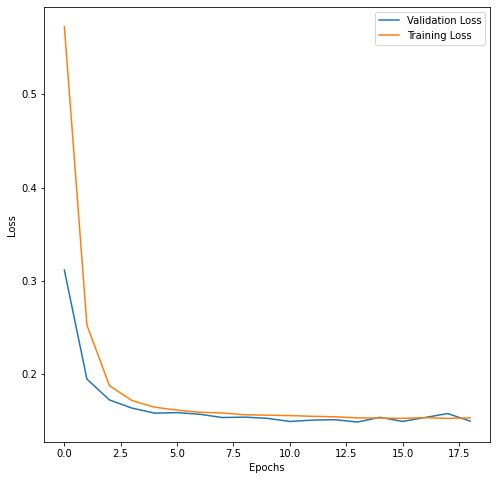

In [14]:
plot_loss(history)


# Task 7: Predictions

## 7.1: Plot Raw Predictions

Let's use the `compare_predictions` helper function to compare predictions from the model when it was untrained and when it was trained.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


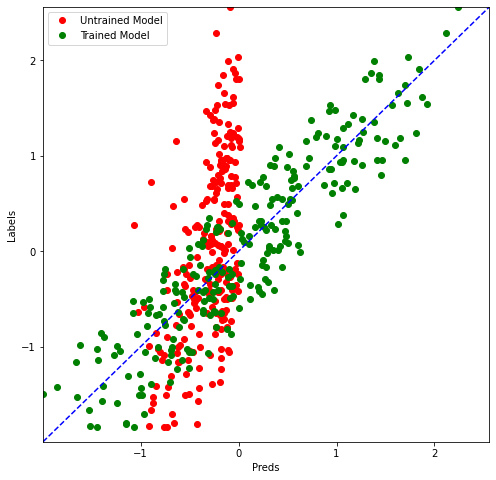

In [15]:
preds_on_trained=model.predict(x_test)
compare_predictions(preds_on_untrained,preds_on_trained,y_test)


## 7.2: Plot Price Predictions

The plot for price predictions and raw predictions will look the same with just one difference: The x and y axis scale is changed.

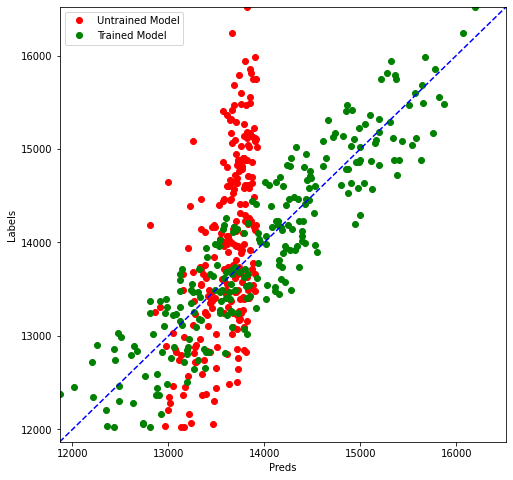

In [16]:
price_untrained=[convert_label_value(y) for y in preds_on_untrained]
price_trained=[convert_label_value(y) for y in preds_on_trained]
price_test=[convert_label_value(y) for y in y_test]

compare_predictions(price_untrained,price_trained,price_test)

